In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# Интервал
a = 0
b = 1

def p(x):
    return 1/(1 + x)

def q(x):
    return -x/(1 + x)

def f(x):
    return -x*np.log(1 + x)/(1 + x)

# Точное решение из задания
def originalSolution(x):
    return np.log(1 + x) + 2*np.exp(-x)

In [20]:
# Константы из условия
alpha1 = 0
beta1 = 1
gamma1 = -1

alpha2 = 6
beta2 = 1
gamma2 = 8.3377

In [21]:
# Вычисление кСЛАУ
def SLE_constants(x_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, order=1):
    n = len(x_plot)
    h = x_plot[1] - x_plot[0]
    
    a_plot = []
    b_plot = []
    c_plot = []
    f_plot = []
    
    b0 = alpha1 - beta1 / h
    c0 = beta1 / h
    f0 = gamma1

    an = (-1) * beta2 / h
    bn = alpha2 + beta2 / h
    fn = gamma2

    if order == 2:
        if beta1 != 0 and beta2 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * h**2 * alpha1 / beta1 + q(x_plot[0]) * h**2
            c0 = 2
            f0 = f(x_plot[0]) * h**2 + 2 * gamma1 * h / beta1 - p(x_plot[0]) * h**2 * gamma1 / beta1

            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * h**2 * alpha2 / beta2 + q(x_plot[n - 1]) * h**2
            fn = f(x_plot[n - 1]) * h**2 - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * h**2 * gamma2 / beta2)
        
        elif beta1 != 0:
            b0 = -2 + 2 * h * alpha1 / beta1 - p(x_plot[0]) * h**2 * alpha1 / beta1 + q(x_plot[0]) * h**2
            c0 = 2
            f0 = f(x_plot[0]) * h**2 + 2 * gamma1 * h / beta1 - p(x_plot[0]) * h**2 * gamma1 / beta1
            
        elif beta2 != 0:
            an = 2
            bn = -2 + (-2) * h * alpha2 / beta2 - p(x_plot[n - 1]) * h**2 * alpha2 / beta2 + q(x_plot[n - 1]) * h**2
            fn = f(x_plot[n - 1]) * h**2 - (2 * h * gamma2 / beta2 + p(x_plot[n - 1]) * h**2 * gamma2 / beta2)


    b_plot.append(b0)
    c_plot.append(c0)
    f_plot.append(f0)

    for k in range(1, n - 1):
        ak =   1  / (h**2) - p(x_plot[k]) / (2 * h)
        bk = (-2) / (h**2) + q(x_plot[k])
        ck =   1  / (h**2) + p(x_plot[k]) / (2 * h)
        fk = f(x_plot[k])

        a_plot.append(ak)
        b_plot.append(bk)
        c_plot.append(ck)
        f_plot.append(fk)

    a_plot.append(an)
    b_plot.append(bn)
    f_plot.append(fn)
    
    return a_plot, b_plot, c_plot, f_plot

In [22]:
# Сам метод прогонки
def Thomas_algorithm(a_plot, b_plot, c_plot, f_plot):
    n1 = len(f_plot) - 1
    y_plot = []
        
    A_plot = []
    B_plot = []
    C_plot = []
    
    A0 = (-1) * c_plot[0] / b_plot[0]
    B0 = f_plot[0] / b_plot[0]
    
    An = 0
    
    A_plot.append(A0)
    B_plot.append(B0)
    
    for i in range(1, n1):
        Ai = (-1) * c_plot[i] / (b_plot[i] + a_plot[i - 1] * A_plot[i - 1])
        A_plot.append(Ai)
    
    for i in range(1, n1 + 1):
        Bi = (f_plot[i] - a_plot[i - 1] * B_plot[i - 1]) / (b_plot[i] + a_plot[i - 1] * A_plot[i - 1])
        B_plot.append(Bi)
    
    A_plot.append(An)    
    
    y_plot.append(B_plot[n1])
    
    for i in range(n1 - 1, -1, -1):
        yi = B_plot[i] + A_plot[i] * y_plot[0]
        y_plot.insert(0, yi)
    
    return y_plot

In [23]:
# Шаг сетки
h = 0.05

# Строим сетку
xGrid= np.linspace(a, b, round((b - a) / h) + 1)

In [24]:
# Получаем константы СЛАУ для метода первого порядка
a1Plot, b1Plot, c1Plot, f1Plot = SLE_constants(xGrid, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)

# Получаем константы СЛАУ для метода второго порядка
a2Plot, b2Plot, c2Plot, f2Plot = SLE_constants(xGrid, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)

In [25]:
# Строим функцию на основе констант СЛАУ для первого порядка
y1Plot = Thomas_algorithm(a1Plot, b1Plot, c1Plot, f1Plot)

# Строим функцию на основе констант СЛАУ для второго порядка
y2Plot = Thomas_algorithm(a2Plot, b2Plot, c2Plot, f2Plot)

# Оригинальная функция
uPlot  = [originalSolution(x) for x in xGrid]

Оригинальное решение и решения построенные методом
Красный - оригинал
Зеленый - Метод прогонки с краевыми 1 порядка
Синий - Метод прогонки с краевыми 2 порядка


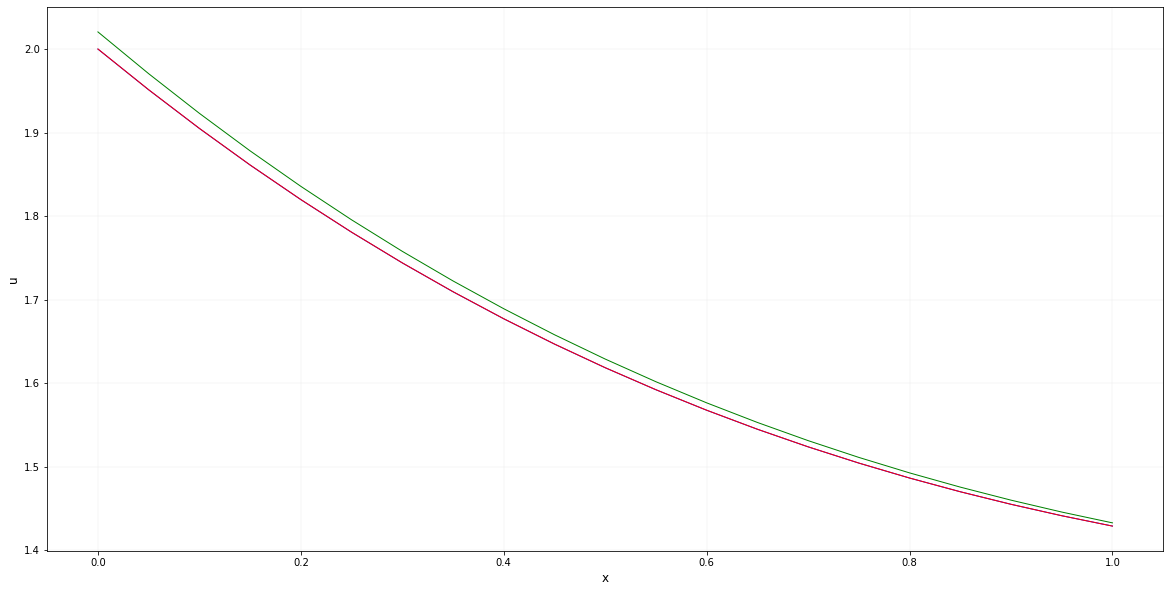

In [26]:
# Выводим построенные штуки
ax = plt.subplots(figsize=(20, 10))[1]

ax.plot(xGrid, y1Plot, color="green", linewidth=1.0)
ax.plot(xGrid, y2Plot, color="blue", linewidth=1.0)
ax.plot(xGrid, uPlot, color="red", linewidth=1.0)

ax.grid(which="major", linewidth=0.1)

ax.set_xlabel("x", fontsize=12)        
ax.set_ylabel("u", fontsize=12)

print("Оригинальное решение и решения построенные методом")
print("Красный - оригинал")
print("Зеленый - Метод прогонки с краевыми 1 порядка")
print("Синий - Метод прогонки с краевыми 2 порядка")

plt.show()

In [27]:
# Выводим значения вычисленных функций в точках сетки
# x - элемент сетки
# y1 - вычисление первой штукой
# y2 - вычисление второй штукой
# u - оригинальное значение

for i in range(len(xGrid)):
    print("x:", xGrid[i], "y1:", y1Plot[i], "y2:", y2Plot[i], "u:",uPlot[i])

x: 0.0 y1: 2.0204300309362706 y2: 1.9998826934229876 u: 2.0
x: 0.05 y1: 1.9704300309362706 y2: 1.9511326934229876 u: 1.9512490131708602
x: 0.1 y1: 1.922979058827755 y2: 1.9048713379031332 u: 1.904985015876244
x: 0.15000000000000002 y1: 1.8780431674527345 y2: 1.8610681673304057 u: 1.8611778952252742
x: 0.2 y1: 1.8355742122718886 y2: 1.8196783145134183 u: 1.8197830629499183
x: 0.25 y1: 1.7955134808353534 y2: 1.7806461523247645 u: 1.7807451174570195
x: 0.30000000000000004 y1: 1.7577945280480558 y2: 1.7439081448302791 u: 1.7440007058309268
x: 0.35000000000000003 y1: 1.7223454019302302 y2: 1.7093950869848475 u: 1.709480771887765
x: 0.4 y1: 1.6890903972772673 y2: 1.677033870648499 u: 1.6771123286924916
x: 0.45 y1: 1.6579514406196056 y2: 1.6467488805934452 u: 1.6468198596760297
x: 0.5 y1: 1.6288491851162445 y2: 1.6184630993468208 u: 1.6185264275334312
x: 0.55 y1: 1.6017038757580824 y2: 1.5920989814125766 u: 1.5921545516921287
x: 0.6000000000000001 y1: 1.5764360316488377 y2: 1.5675791437742843

In [28]:
# Вычисление максимальной ошибки для различных шагов

hPlot = []
errorsPlotForFirstOrder = []
errorsPlotForSecondOrder = []

for n in np.arange(10, 1001, step=10):    
    
    x0_plot, h = np.linspace(a, b, n, retstep=True)
    
    a1Plot, b1Plot, c1Plot, f1Plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 1)
    a2Plot, b2Plot, c2Plot, f2Plot = SLE_constants(x0_plot, alpha1, alpha2, beta1, beta2, gamma1, gamma2, p, q, f, 2)
    
    yFirstOrderPlot = Thomas_algorithm(a1Plot, b1Plot, c1Plot, f1Plot)
    ySecondOrderPlot = Thomas_algorithm(a2Plot, b2Plot, c2Plot, f2Plot)
    uPlot  = [originalSolution(x) for x in x0_plot]
    
    maxErrorFirstOrder = max([abs(firstOrderValue - originalValue) for firstOrderValue, originalValue in zip(yFirstOrderPlot, uPlot)])
    maxErrorSecondOrder = max([abs(secondOrderValue - originalValue) for secondOrderValue, originalValue in zip(ySecondOrderPlot, uPlot)])
    
    hPlot.append(h)
    errorsPlotForFirstOrder.append(maxErrorFirstOrder)
    errorsPlotForSecondOrder.append(maxErrorSecondOrder)

In [29]:
# Выводим максимальную ошибку в зависимост от шага

for i in range(20):
    print("h:", hPlot[i], "y1:", errorsPlotForFirstOrder[i], "y2:", errorsPlotForSecondOrder[i])

h: 0.1111111111111111 y1: 0.04640418754989728 y2: 0.0005951445597898175
h: 0.05263157894736842 y1: 0.021525528452135845 y2: 0.00013035240535774761
h: 0.034482758620689655 y1: 0.014012064511772504 y2: 5.4034091533372575e-05
h: 0.02564102564102564 y1: 0.010386870098075374 y2: 2.840005669657586e-05
h: 0.02040816326530612 y1: 0.008252164562497999 y2: 1.6784846465611736e-05
h: 0.01694915254237288 y1: 0.006845492765875871 y2: 1.0557356175722177e-05
h: 0.014492753623188406 y1: 0.005848677252699996 y2: 6.835595264931271e-06
h: 0.012658227848101266 y1: 0.005105370145375154 y2: 4.435533169644401e-06
h: 0.011235955056179775 y1: 0.004529774493360783 y2: 4.093951647021754e-06
h: 0.010101010101010102 y1: 0.0040708841652787875 y2: 4.00077692330747e-06
h: 0.009174311926605505 y1: 0.0036964724486558964 y2: 3.932048820542988e-06
h: 0.008403361344537815 y1: 0.0033851778104616592 y2: 3.879907132908755e-06
h: 0.007751937984496124 y1: 0.0031222808926876233 y2: 3.839414342454717e-06
h: 0.007194244604316547 y

Макс. ошибка в зависимости от шага
Оранжевый - Метод с кравевыми 1 порядка
Зеленый - Метода с краевыми 2 порядка


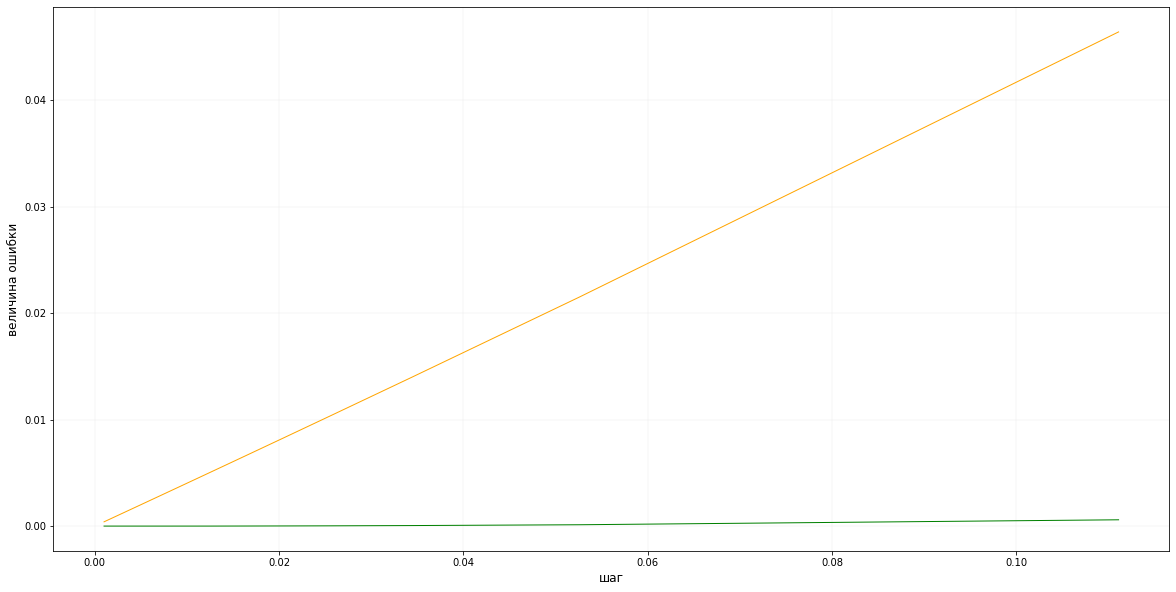

In [30]:
# Строим графики
ax = plt.subplots(figsize=(20, 10))[1]

ax.plot(hPlot, errorsPlotForFirstOrder, color="orange", linewidth=1.0)
ax.plot(hPlot, errorsPlotForSecondOrder, color="green", linewidth=1.0)

ax.grid(which="major", linewidth=0.1)

ax.set_xlabel("шаг", fontsize=12)        
ax.set_ylabel("величина ошибки", fontsize=12)

print("Макс. ошибка в зависимости от шага")
print("Оранжевый - Метод с кравевыми 1 порядка")
print("Зеленый - Метода с краевыми 2 порядка")

plt.show()

In [40]:
# Логарифмируем шаги и макс. ошибку
# Получаем зависимость логарифма ошибки от логарифма шага 
ln_hPlot = np.log(hPlot)
ln_errorsPlotFirstOrder = np.log(errorsPlotForFirstOrder)
ln_errorsPlotSecondOrder = np.log(errorsPlotForSecondOrder)

ln_errors_plot2 = ln_errorsPlotSecondOrder
ln_hPlot2 = ln_hPlot

Зависимость логарифма ошибки от логарифма шага
Оранжевая для 1 штуки
Зеленая для 2 штуки


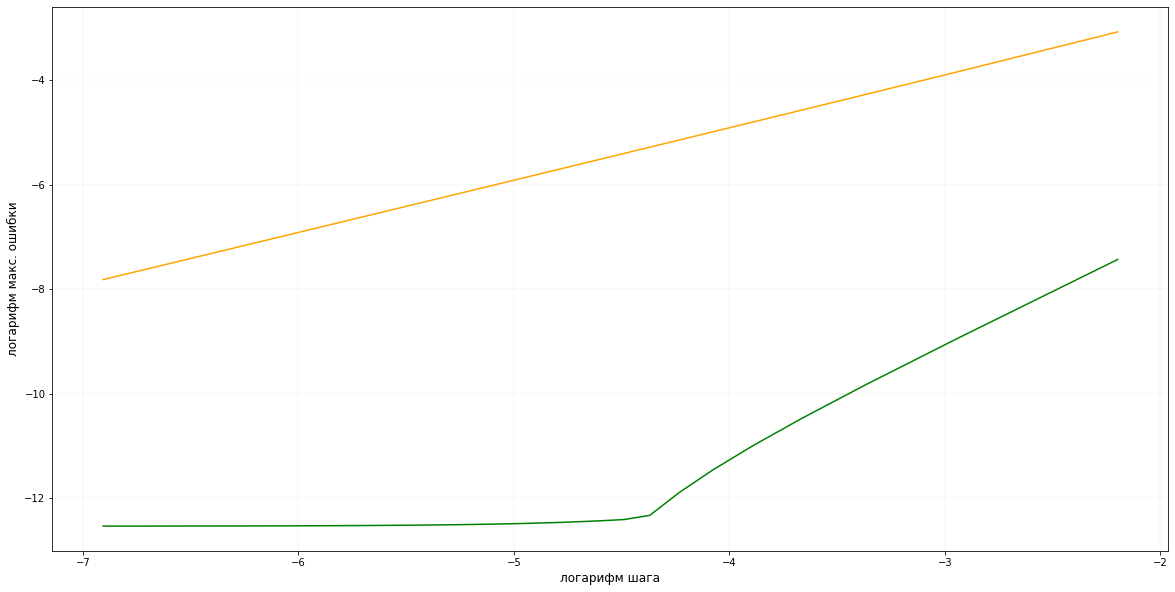

In [41]:
ax = plt.subplots(figsize=(20, 10))[1]

ax.plot(ln_hPlot, ln_errorsPlotFirstOrder, color="orange")
ax.plot(ln_hPlot2, ln_errors_plot2, color="green")

ax.grid(which="major", linewidth=0.1)

ax.set_xlabel("логарифм шага", fontsize=12)        
ax.set_ylabel("логарифм макс. ошибки", fontsize=12)

print("Зависимость логарифма ошибки от логарифма шага")
print("Оранжевая для 1 штуки")
print("Зеленая для 2 штуки")

plt.show()

In [34]:
coeffForFirstOrder = 0
coeffForSecondOrder = 0

# Считаем коэффицент наклона(порядок) для краевых первого порядка
for index in range(len(ln_hPlot)):
    coeffForFirstOrder += ln_hPlot[index] * ln_errorsPlotFirstOrder[index]
coeffForFirstOrder *= len(ln_hPlot)

coeffForFirstOrder -= (np.sum(ln_hPlot) * np.sum(ln_errorsPlotFirstOrder))
coeffForFirstOrder /= (len(ln_hPlot) * np.sum(np.power(ln_hPlot, 2)) - np.power(np.sum(ln_hPlot), 2))


# Считаем коэффицент наклона(порядок) для краевых второго порядка
for index in range(len(ln_hPlot2)):
    coeffForSecondOrder += ln_hPlot2[index] * ln_errors_plot2[index]
coeffForSecondOrder *= len(ln_hPlot2)

coeffForSecondOrder -= (np.sum(ln_hPlot2) * np.sum(ln_errors_plot2))
coeffForSecondOrder /= (len(ln_hPlot2) * np.sum(np.power(ln_hPlot2, 2)) - np.power(np.sum(ln_hPlot2), 2))


print("Для первой штуки коэф. наклона = ", coeffForFirstOrder)
print("Для второй штуки коэф. наклона = ", coeffForSecondOrder)

Для первой штуки коэф. наклона =  1.0014879213660621
Для второй штуки коэф. наклона =  2.1904108031229073
